# Pearson  Chi Square Test

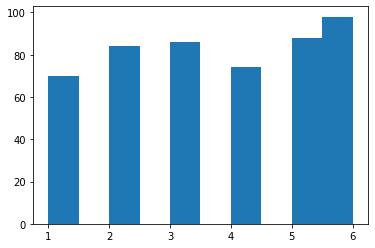

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("loaded_500.txt")
unique , counts = np.unique(data, return_counts= True)
plt.hist(data);

In [2]:
expected =data.size /6
chi2_val = np.sum((counts - expected)**2/expected )
print(chi2_val)

6.112


Our p-value is 0.295


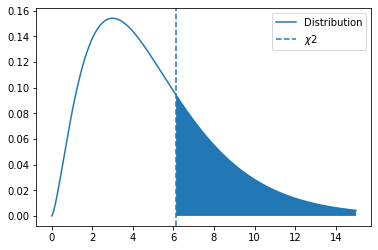

In [4]:
from scipy.stats import chi2
chi2s = np.linspace(0, 15, 500)
prob = chi2.pdf(chi2s, 5)

plt.plot(chi2s, prob, label="Distribution")
plt.axvline(chi2_val, label="$\chi2$", ls="--")
plt.fill_between(chi2s, prob, 0, where=(chi2s>=chi2_val), alpha=3)
plt.legend();
print(f"Our p-value is {chi2.sf(chi2_val, 5):.3f}")


In [5]:
from scipy.stats import chisquare 
chisq ,p = chisquare(counts,expected)
print(f"We have a chi2 of {chisq:.2f} with a p-value of {p:.3f}")

We have a chi2 of 6.11 with a p-value of 0.295


# K.S Test

In [8]:
import numpy as np
import matplotlib.pyplot as plt

rolls_obs = np.loadtxt("loaded_many_100.txt")
unique, count_obs = np.unique(rolls_obs,return_counts = True)
count_obs = count_obs/count_obs.sum()


In [11]:
rolls_fair = np.random.randint(low = 1 , high = 7, size =(500000,10)).sum(axis=1)
unique2, count_fair= np.unique(rolls_fair,return_counts = True)
count_fair = count_fair/ count_fair.sum()

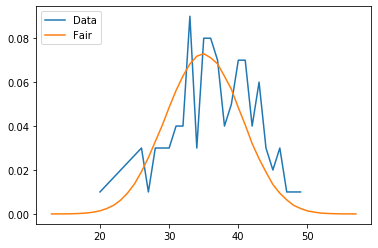

In [12]:
plt.plot(unique, count_obs, label="Data")
plt.plot(unique2, count_fair, label="Fair")
plt.legend()
plt.legend(loc=2);

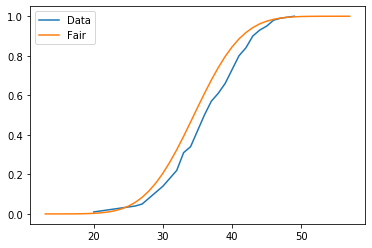

In [13]:
cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()
plt.plot(unique, cdf_obs, label="Data")
plt.plot(unique2, cdf_fair, label="Fair")
plt.legend(loc=2);

In [15]:
from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(rolls_obs,roll_fair)
print(f"KS test statistic of {statistic:.3f}, p-value of {pvalue:.3f}")

KS test statistic of 0.135, p-value of 0.053


# Anderson_ Darling_Test

In [16]:
from scipy.stats import anderson_ksamp
statistic, critical_values, sig_level = anderson_ksamp([rolls_obs, rolls_fair])
print(f"AD test statistic of {statistic:.5f}, sig-level of {sig_level:.9f}")
print(f"Test critical values are {critical_values}")
print("Sig-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]")

AD test statistic of 5.50549, sig-level of 0.002295140
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Sig-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]
